In [ ]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#ML
import sklearn

In [ ]:
df_agri_hti = pd.read_csv('/content/drive/MyDrive/UN Datathon 2023/Haiti/agriculture-and-rural-development_hti.csv')
# remove 1st row
df_agri_hti = df_agri_hti.tail(-1).reset_index(drop=True)
df_agri_hti

,Country Name,Country ISO3,Year,Indicator Name,Indicator Code,Value
0,Haiti,HTI,1998,"Agricultural machinery, tractors",AG.AGR.TRAC.NO,146
1,Haiti,HTI,1997,"Agricultural machinery, tractors",AG.AGR.TRAC.NO,136
2,Haiti,HTI,1996,"Agricultural machinery, tractors",AG.AGR.TRAC.NO,135
3,Haiti,HTI,1995,"Agricultural machinery, tractors",AG.AGR.TRAC.NO,140
4,Haiti,HTI,1994,"Agricultural machinery, tractors",AG.AGR.TRAC.NO,150
...,...,...,...,...,...,...
1697,Haiti,HTI,1974,Agricultural raw materials exports (% of merch...,TX.VAL.AGRI.ZS.UN,8.06752881056016
1698,Haiti,HTI,1973,Agricultural raw materials exports (% of merch...,TX.VAL.AGRI.ZS.UN,3.95572548672917
1699,Haiti,HTI,1972,Agricultural raw materials exports (% of merch...,TX.VAL.AGRI.ZS.UN,2.49477010095601
1700,Haiti,HTI,1971,Agricultural raw materials exports (% of merch...,TX.VAL.AGRI.ZS.UN,2.44337135779525


In [ ]:
df_agri_hti_1 = df_agri_hti[['Year', 'Indicator Name', 'Value']]
df_agri_hti_1

,Year,Indicator Name,Value
0,1998,"Agricultural machinery, tractors",146
1,1997,"Agricultural machinery, tractors",136
2,1996,"Agricultural machinery, tractors",135
3,1995,"Agricultural machinery, tractors",140
4,1994,"Agricultural machinery, tractors",150
...,...,...,...
1697,1974,Agricultural raw materials exports (% of merch...,8.06752881056016
1698,1973,Agricultural raw materials exports (% of merch...,3.95572548672917
1699,1972,Agricultural raw materials exports (% of merch...,2.49477010095601
1700,1971,Agricultural raw materials exports (% of merch...,2.44337135779525


In [ ]:
df_agri_hti_pivot = df_agri_hti_1.pivot(index='Year', columns='Indicator Name', values='Value')
df_agri_hti_pivot = df_agri_hti_pivot.reset_index()
df_agri_hti_pivot = df_agri_hti_pivot.apply(pd.to_numeric)
df_agri_hti_pivot

Indicator Name,Year,"Access to electricity, rural (% of rural population)",Agricultural irrigated land (% of total agricultural land),Agricultural land (% of land area),Agricultural land (sq. km),"Agricultural machinery, tractors","Agricultural machinery, tractors per 100 sq. km of arable land",Agricultural methane emissions (% of total),Agricultural methane emissions (thousand metric tons of CO2 equivalent),Agricultural nitrous oxide emissions (% of total),...,Livestock production index (2014-2016 = 100),Permanent cropland (% of land area),Rural land area (sq. km),Rural land area where elevation is below 5 meters (% of total land area),Rural land area where elevation is below 5 meters (sq. km),Rural population,Rural population (% of total population),Rural population growth (annual %),Rural population living in areas where elevation is below 5 meters (% of total population),Surface area (sq. km)
0,1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3292834,84.407,NaN,NaN,NaN
1,1961,NaN,NaN,60.232221,16600.0,80.0,0.888889,NaN,NaN,NaN,...,35.86,9.433962,NaN,NaN,NaN,3339938,84.025,1.420365,NaN,27750.0
2,1962,NaN,NaN,60.413643,16650.0,85.0,0.944444,NaN,NaN,NaN,...,36.70,9.615385,NaN,NaN,NaN,3386803,83.635,1.393416,NaN,27750.0
3,1963,NaN,NaN,60.595065,16700.0,90.0,1.000000,NaN,NaN,NaN,...,37.78,9.796807,NaN,NaN,NaN,3431287,83.238,1.304900,NaN,27750.0
4,1964,NaN,NaN,60.776488,16750.0,95.0,1.055556,NaN,NaN,NaN,...,38.77,9.978229,NaN,NaN,NaN,3475920,82.832,1.292378,NaN,27750.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,2018,1.824046,NaN,72.387518,19950.0,NaN,NaN,NaN,3022.0400,NaN,...,97.31,11.792453,NaN,NaN,NaN,4924975,44.722,-0.701436,NaN,27750.0
59,2019,1.217435,NaN,64.949202,17900.0,NaN,NaN,NaN,3054.3150,NaN,...,98.85,10.885341,NaN,NaN,NaN,4889165,43.808,-0.729767,NaN,27750.0
60,2020,NaN,NaN,64.949202,17900.0,NaN,NaN,NaN,3073.6075,NaN,...,101.01,10.885341,NaN,NaN,NaN,4851974,42.912,-0.763590,NaN,27750.0
61,2021,NaN,NaN,65.130624,17950.0,NaN,NaN,NaN,NaN,NaN,...,102.15,10.885341,NaN,NaN,NaN,4812100,42.036,-0.825205,NaN,27750.0


In [ ]:
df_agri_hti_pivot.isnull().sum()

Indicator Name
Year                                                                                           0
Access to electricity, rural (% of rural population)                                          39
Agricultural irrigated land (% of total agricultural land)                                    61
Agricultural land (% of land area)                                                             2
Agricultural land (sq. km)                                                                     2
Agricultural machinery, tractors                                                              25
Agricultural machinery, tractors per 100 sq. km of arable land                                25
Agricultural methane emissions (% of total)                                                   24
Agricultural methane emissions (thousand metric tons of CO2 equivalent)                       32
Agricultural nitrous oxide emissions (% of total)                                             24
Agricultural ni

In [ ]:
df_agri_hti_pivot.describe()

Indicator Name,Year,"Access to electricity, rural (% of rural population)",Agricultural irrigated land (% of total agricultural land),Agricultural land (% of land area),Agricultural land (sq. km),"Agricultural machinery, tractors","Agricultural machinery, tractors per 100 sq. km of arable land",Agricultural methane emissions (% of total),Agricultural methane emissions (thousand metric tons of CO2 equivalent),Agricultural nitrous oxide emissions (% of total),...,Livestock production index (2014-2016 = 100),Permanent cropland (% of land area),Rural land area (sq. km),Rural land area where elevation is below 5 meters (% of total land area),Rural land area where elevation is below 5 meters (sq. km),Rural population,Rural population (% of total population),Rural population growth (annual %),Rural population living in areas where elevation is below 5 meters (% of total population),Surface area (sq. km)
count,63.000000,24.000000,2.000000,61.000000,61.000000,38.000000,38.000000,39.000000,31.000000,39.000000,...,61.000000,61.000000,3.000000,3.000000,3.000000,6.300000e+01,63.000000,62.000000,3.000000,61.0
mean,1991.000000,7.408091,4.604456,62.069244,17106.283607,151.763158,1.881839,62.068688,2844.131048,86.934992,...,70.610984,11.242238,25834.868217,2.127135,574.627842,4.629101e+06,67.611857,0.597975,1.291884,27750.0
std,18.330303,4.226529,1.040838,5.459083,1504.523171,38.579111,0.564236,8.358773,254.963417,2.097265,...,22.072125,1.092843,161.547087,0.022572,6.097695,6.396112e+05,13.612580,0.958640,0.163835,0.0
min,1960.000000,1.217435,3.868472,57.148041,15750.000000,80.000000,0.888889,50.804620,2150.780000,83.344300,...,35.860000,9.433962,25688.068299,2.105388,568.753129,3.292834e+06,41.180000,-1.115350,1.138023,27750.0
25%,1975.500000,3.772386,4.236464,57.982583,15980.000000,126.250000,1.402778,54.891986,2664.456250,85.025634,...,55.050000,10.703919,25748.331506,2.115477,571.478562,4.117155e+06,55.911000,-0.345237,1.205756,27750.0
50%,1991.000000,7.213242,4.604456,60.595065,16700.000000,150.000000,1.920573,57.065876,2962.155000,87.333333,...,63.040000,11.066763,25808.594714,2.125566,574.203995,4.889165e+06,70.359000,0.852332,1.273489,27750.0
75%,2006.500000,10.108789,4.972447,64.223512,17700.000000,180.000000,2.307692,70.243938,3013.950000,88.531566,...,96.100000,11.611030,25908.268177,2.138008,577.565199,5.134420e+06,79.582500,1.301817,1.368814,27750.0
max,2022.000000,18.734682,5.340439,75.036284,20680.000000,220.000000,2.820513,73.204420,3115.922500,90.517241,...,102.250000,14.441219,26007.941639,2.150450,580.926403,5.383985e+06,84.407000,1.985109,1.464140,27750.0


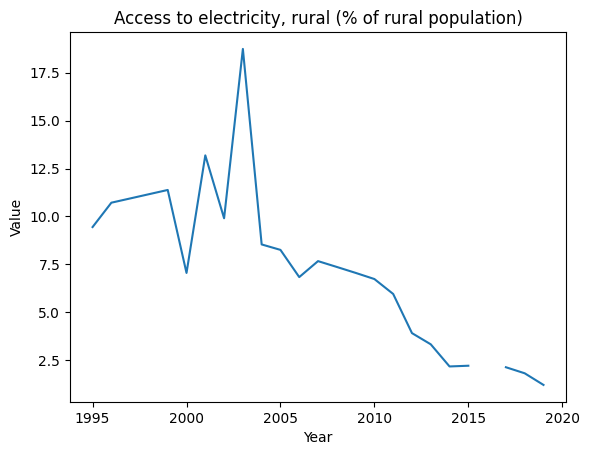

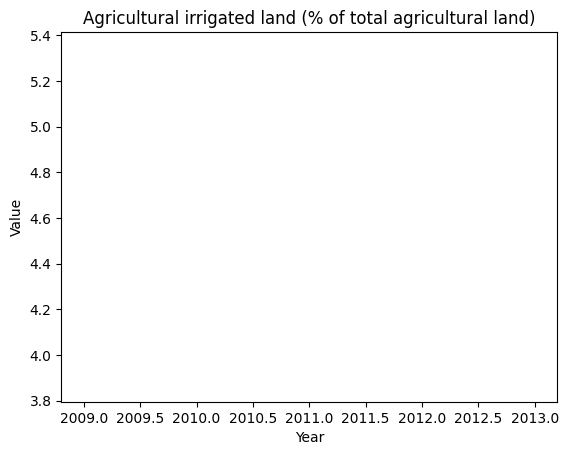

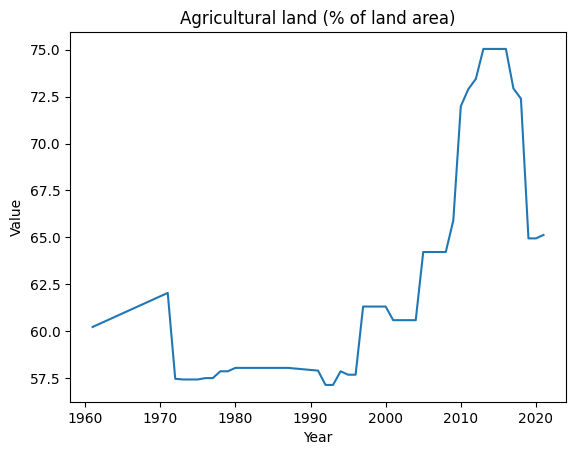

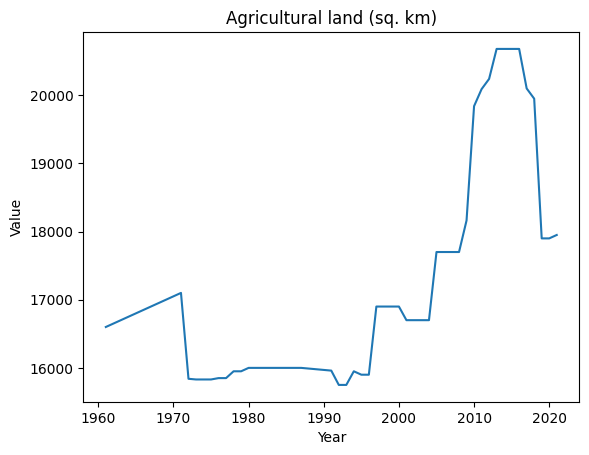

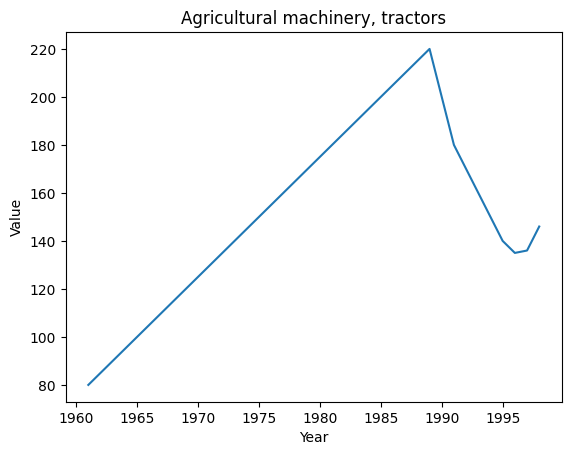

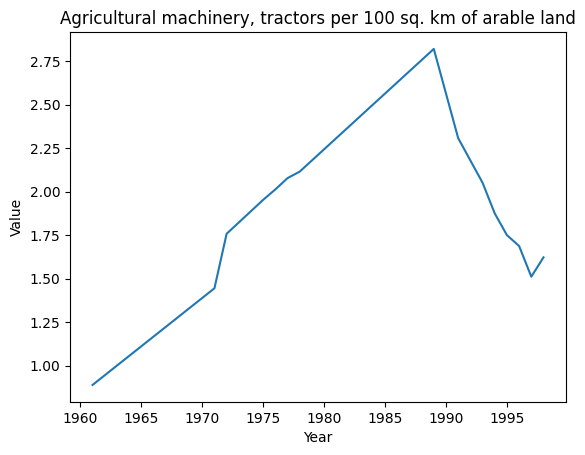

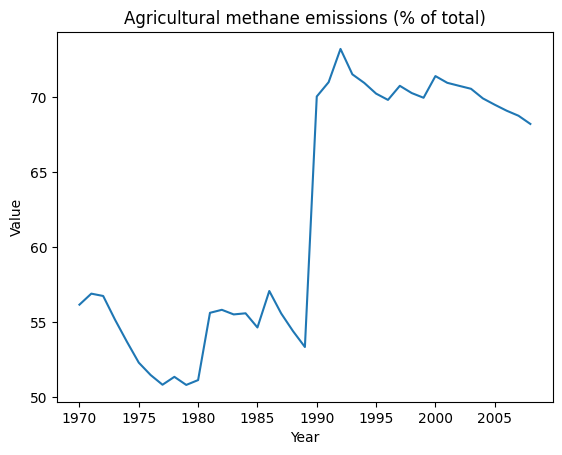

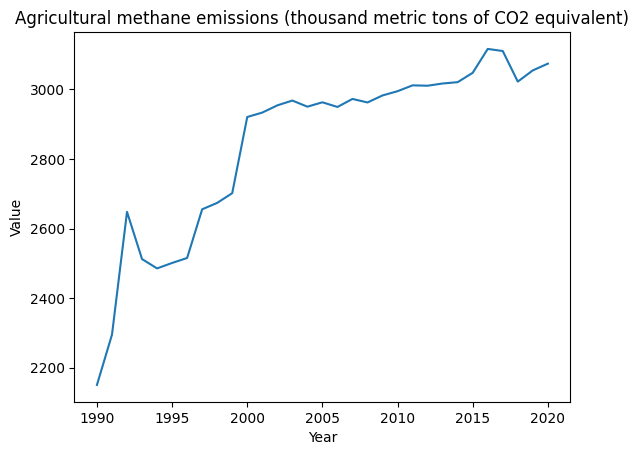

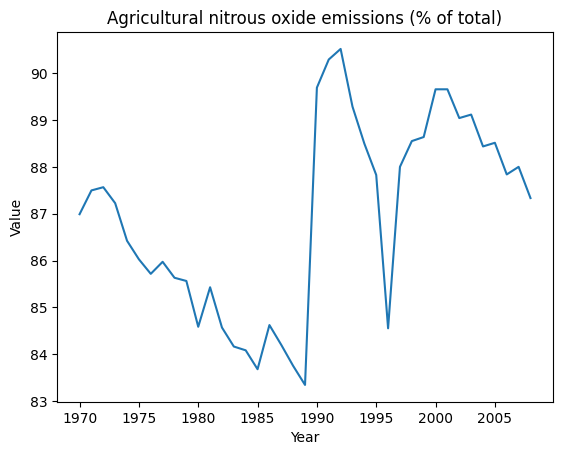

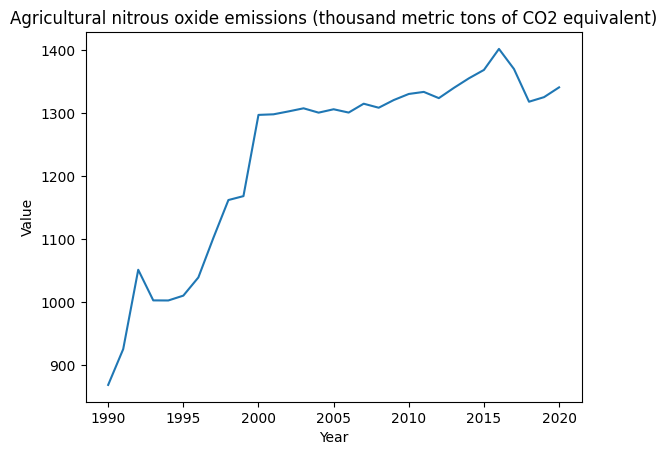

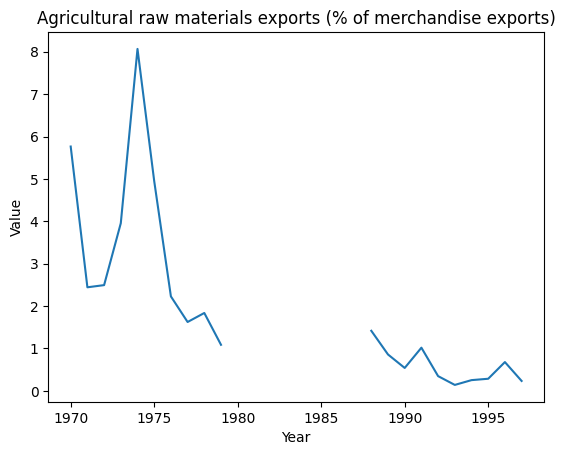

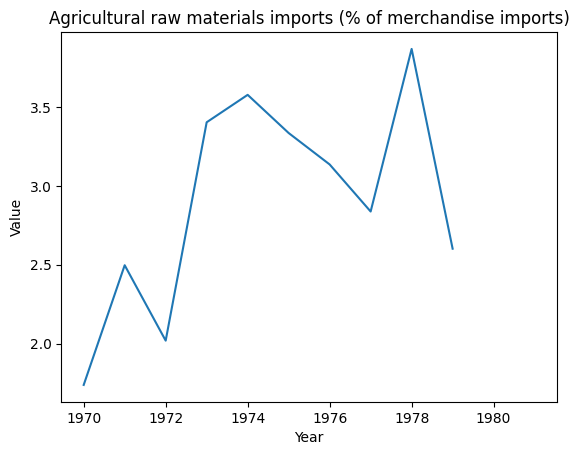

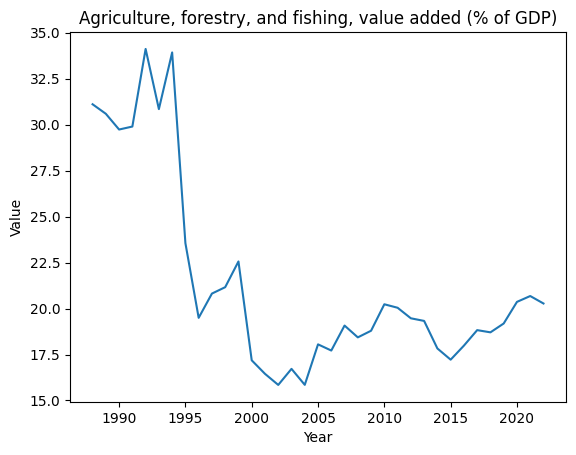

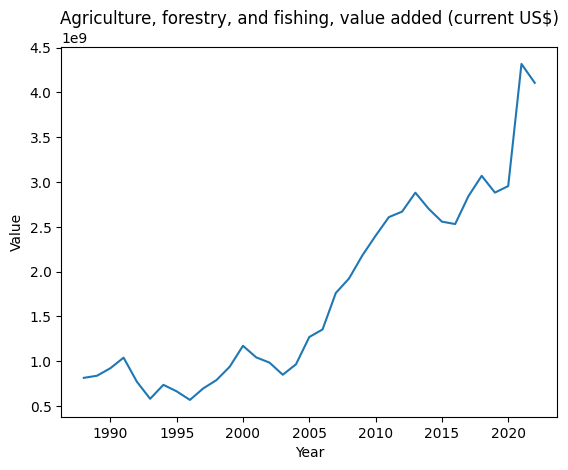

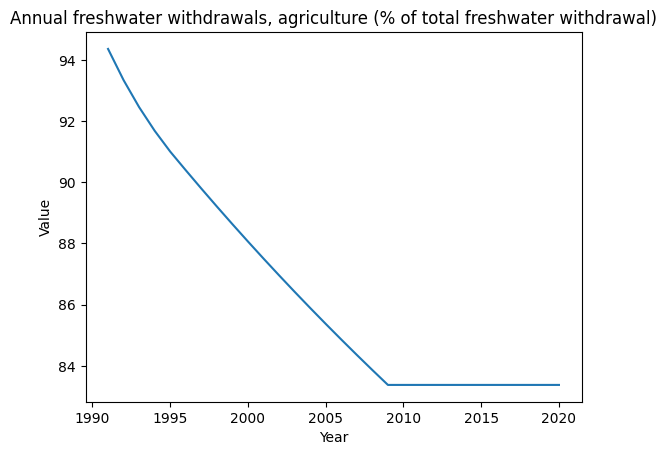

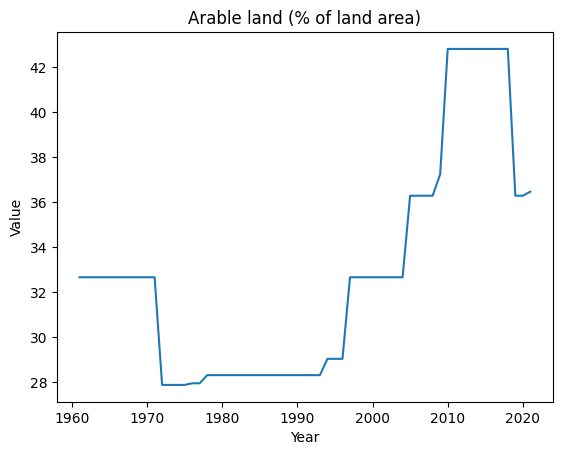

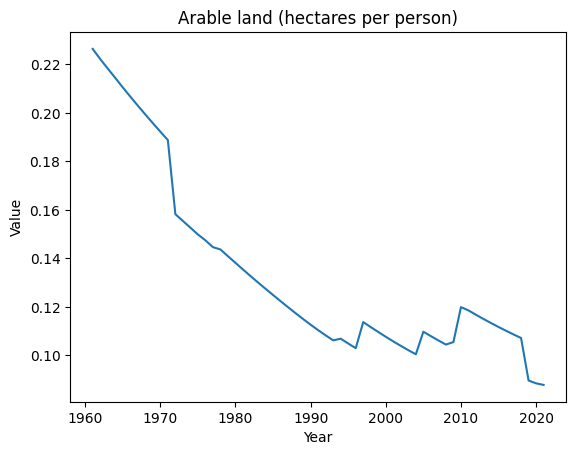

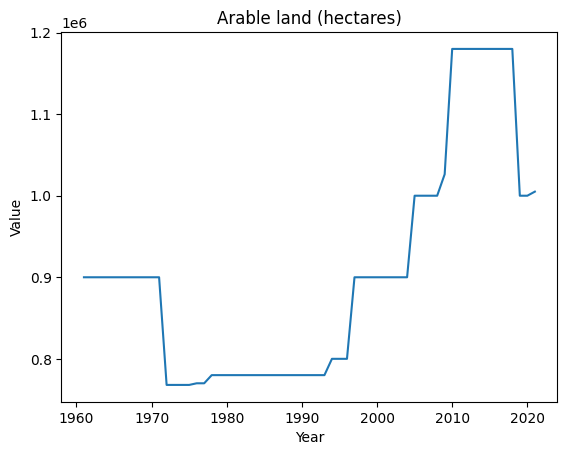

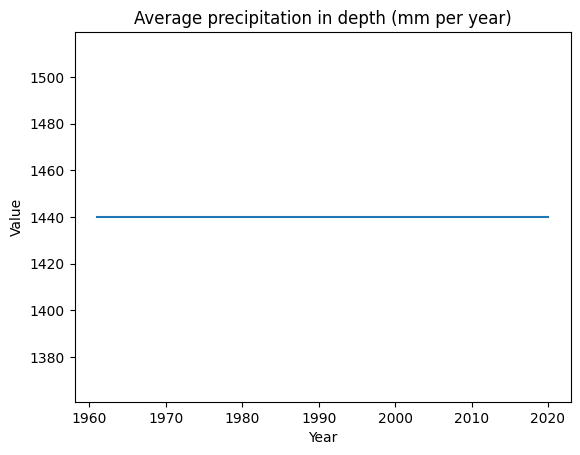

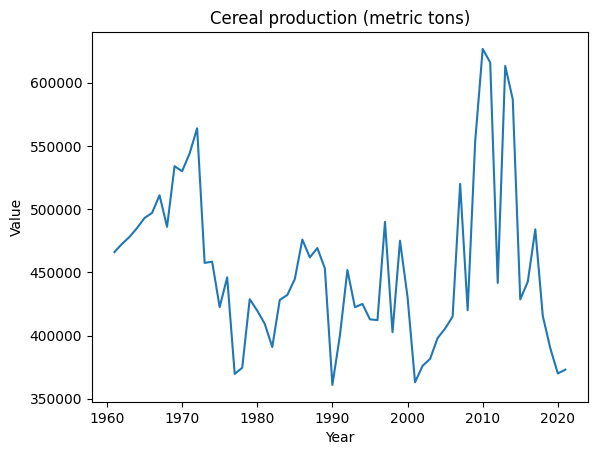

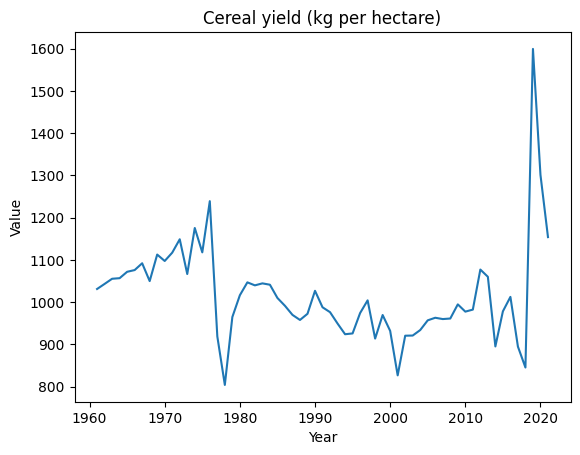

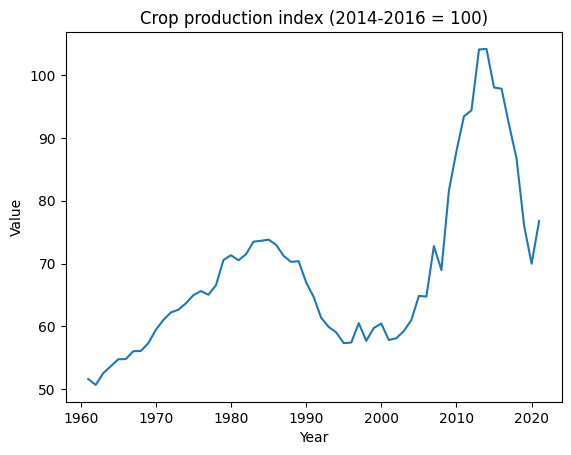

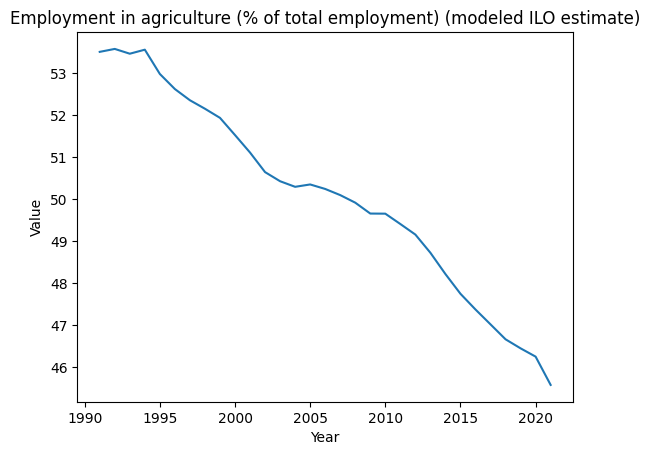

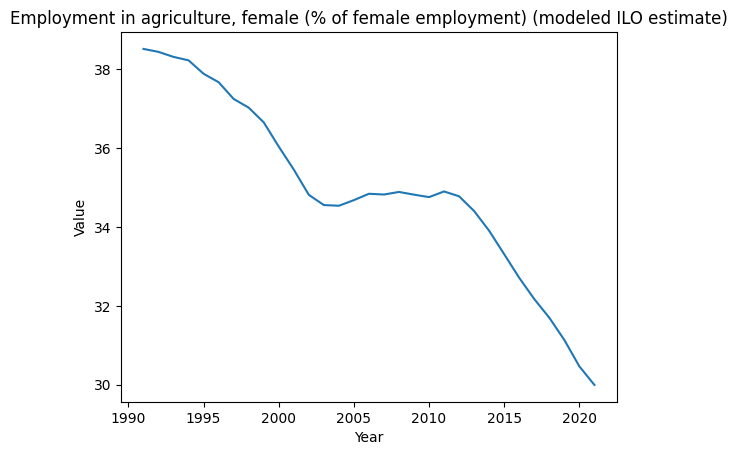

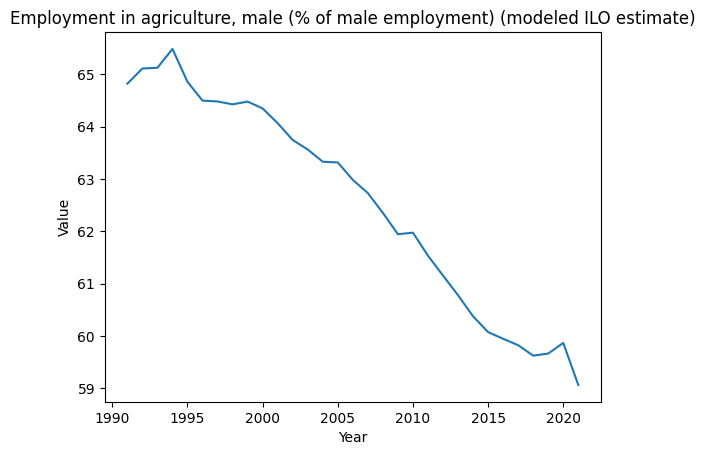

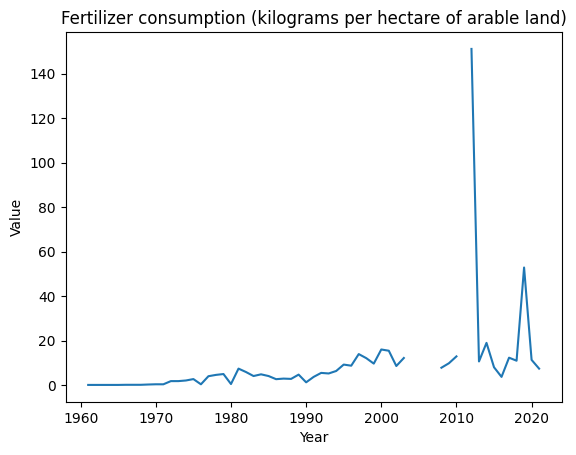

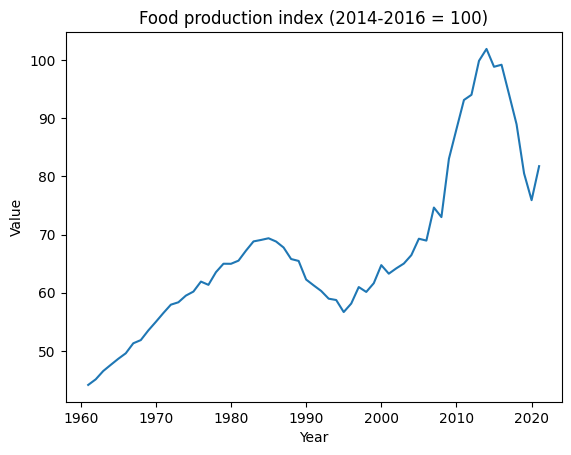

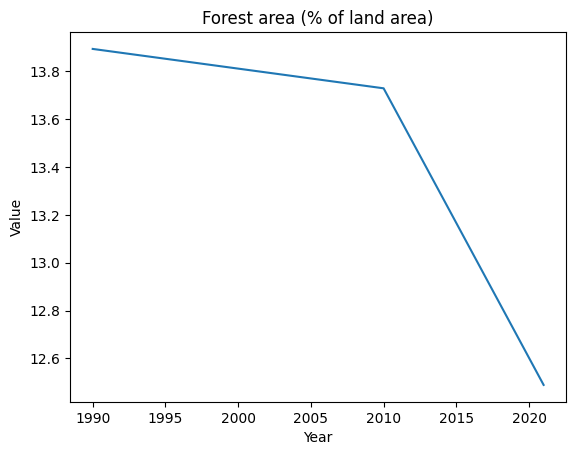

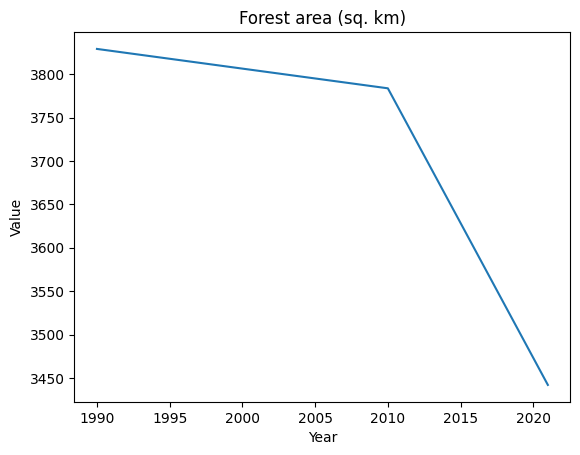

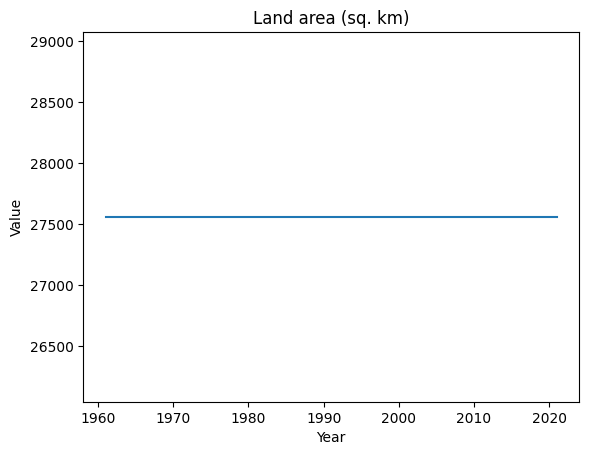

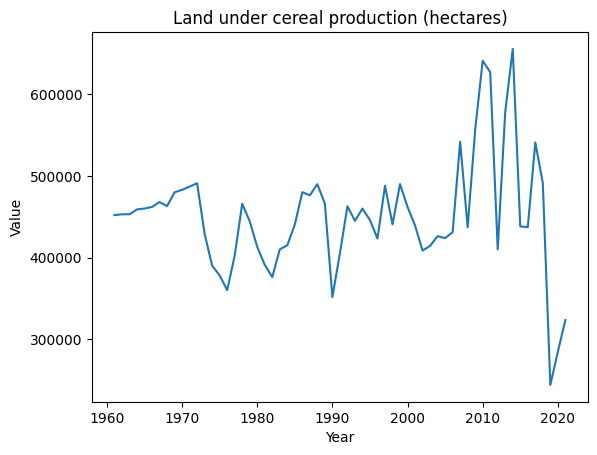

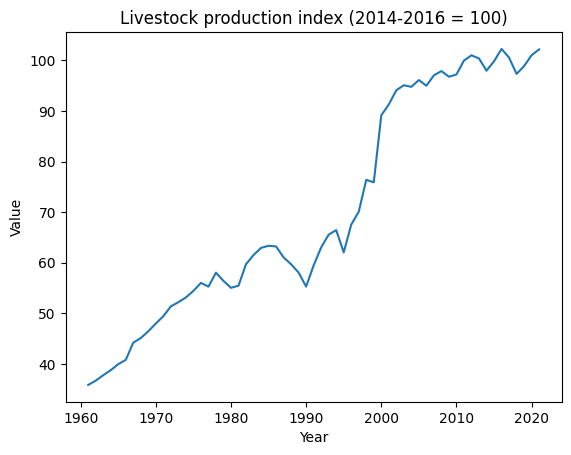

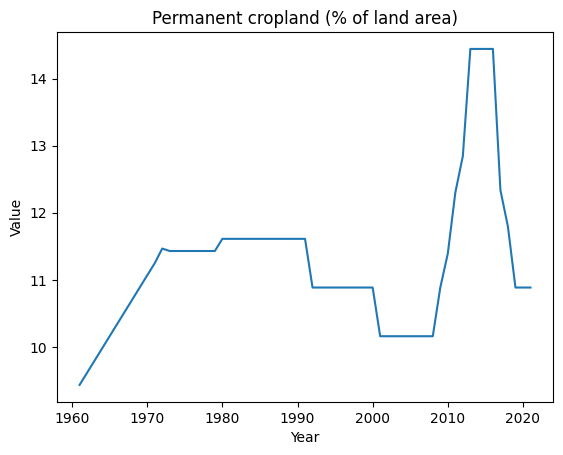

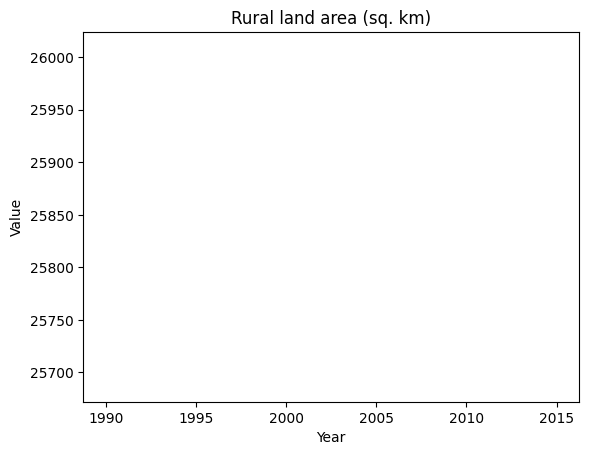

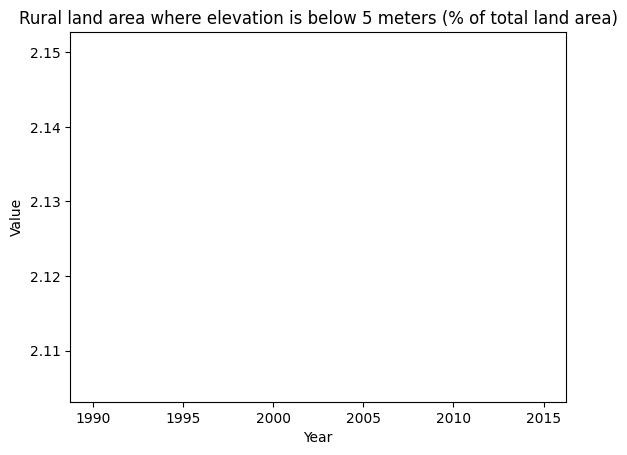

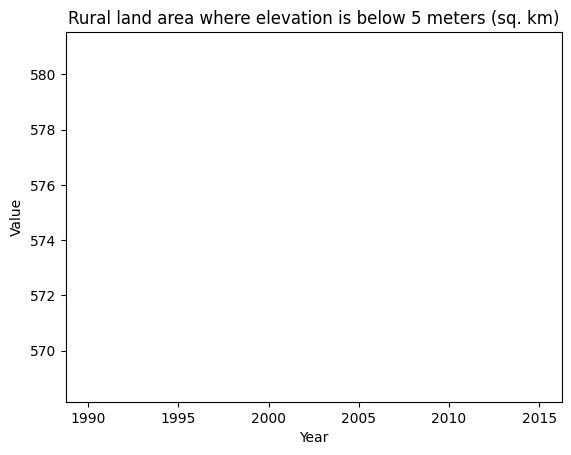

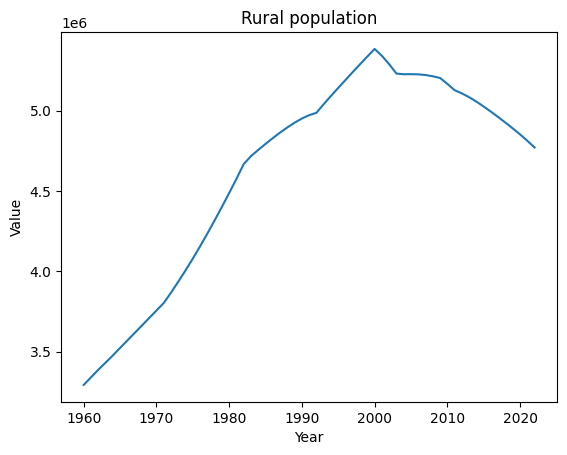

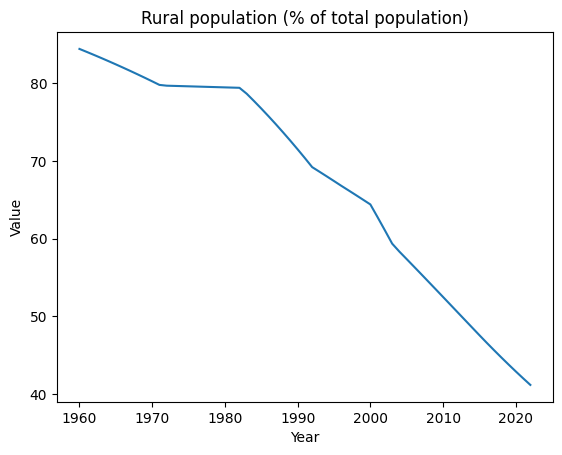

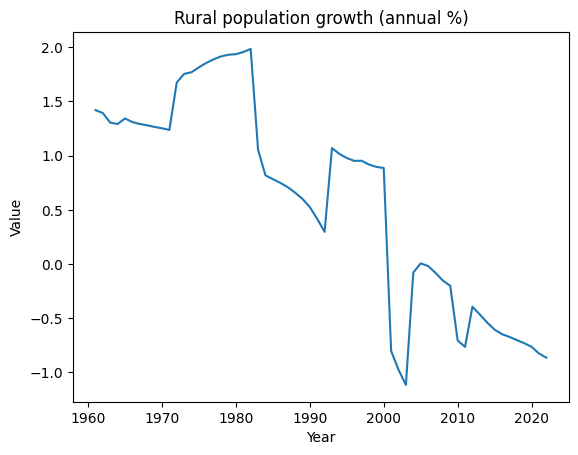

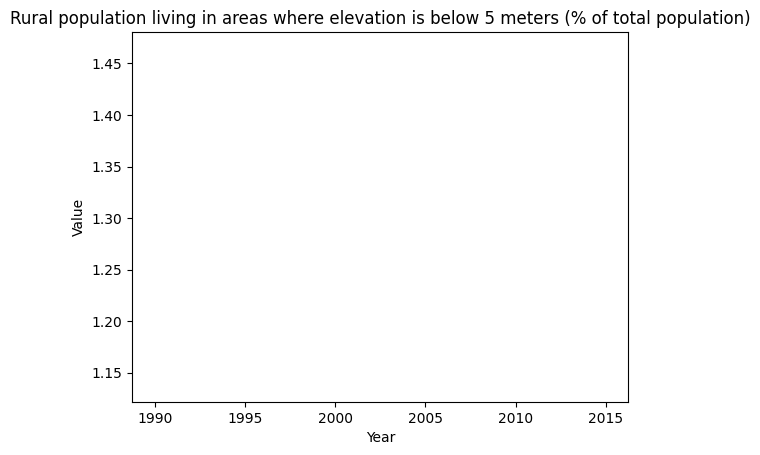

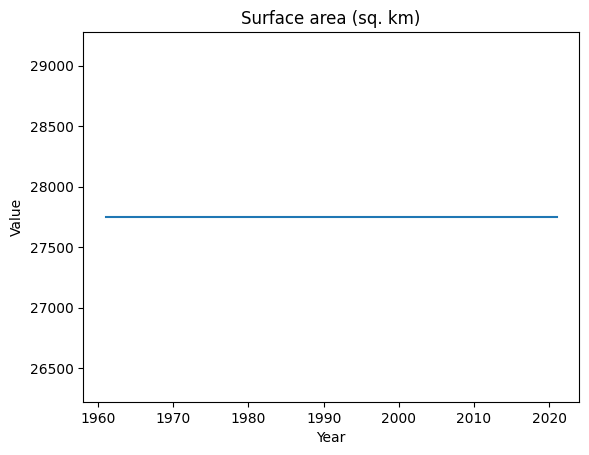

In [ ]:
# plot line chart for all cols wrt yr
for col in df_agri_hti_pivot.columns[1:]:
  plt.plot(df_agri_hti_pivot['Year'], df_agri_hti_pivot[col])
  plt.title(col)
  plt.xlabel('Year')
  plt.ylabel('Value')
  plt.show()

--- HAITI - MYANMAR BOUNDARY ---

In [ ]:
df_agri_mmr = pd.read_csv('/content/drive/MyDrive/UN Datathon 2023/Myanmar/agriculture-and-rural-development_mmr.csv')
# remove 1st row
df_agri_mmr = df_agri_mmr.tail(-1).reset_index(drop=True)
df_agri_mmr

,Country Name,Country ISO3,Year,Indicator Name,Indicator Code,Value
0,Myanmar,MMR,2008,"Agricultural machinery, tractors",AG.AGR.TRAC.NO,11551
1,Myanmar,MMR,2007,"Agricultural machinery, tractors",AG.AGR.TRAC.NO,11475
2,Myanmar,MMR,2006,"Agricultural machinery, tractors",AG.AGR.TRAC.NO,11207
3,Myanmar,MMR,2005,"Agricultural machinery, tractors",AG.AGR.TRAC.NO,10665
4,Myanmar,MMR,2004,"Agricultural machinery, tractors",AG.AGR.TRAC.NO,10315
...,...,...,...,...,...,...
1777,Myanmar,MMR,1966,Agricultural raw materials exports (% of merch...,TX.VAL.AGRI.ZS.UN,21.4540200830197
1778,Myanmar,MMR,1965,Agricultural raw materials exports (% of merch...,TX.VAL.AGRI.ZS.UN,19.329529016567
1779,Myanmar,MMR,1964,Agricultural raw materials exports (% of merch...,TX.VAL.AGRI.ZS.UN,17.3088686721149
1780,Myanmar,MMR,1963,Agricultural raw materials exports (% of merch...,TX.VAL.AGRI.ZS.UN,17.1299239629427


In [ ]:
df_agri_mmr_1 = df_agri_mmr[['Year', 'Indicator Name', 'Value']]
df_agri_mmr_1

,Year,Indicator Name,Value
0,2008,"Agricultural machinery, tractors",11551
1,2007,"Agricultural machinery, tractors",11475
2,2006,"Agricultural machinery, tractors",11207
3,2005,"Agricultural machinery, tractors",10665
4,2004,"Agricultural machinery, tractors",10315
...,...,...,...
1777,1966,Agricultural raw materials exports (% of merch...,21.4540200830197
1778,1965,Agricultural raw materials exports (% of merch...,19.329529016567
1779,1964,Agricultural raw materials exports (% of merch...,17.3088686721149
1780,1963,Agricultural raw materials exports (% of merch...,17.1299239629427


In [ ]:
df_agri_mmr_pivot = df_agri_mmr_1.pivot(index='Year', columns='Indicator Name', values='Value')
df_agri_mmr_pivot = df_agri_mmr_pivot.reset_index()
df_agri_mmr_pivot = df_agri_mmr_pivot.apply(pd.to_numeric)
df_agri_mmr_pivot

Indicator Name,Year,"Access to electricity, rural (% of rural population)",Agricultural irrigated land (% of total agricultural land),Agricultural land (% of land area),Agricultural land (sq. km),"Agricultural machinery, tractors","Agricultural machinery, tractors per 100 sq. km of arable land",Agricultural methane emissions (% of total),Agricultural methane emissions (thousand metric tons of CO2 equivalent),Agricultural nitrous oxide emissions (% of total),...,Livestock production index (2014-2016 = 100),Permanent cropland (% of land area),Rural land area (sq. km),Rural land area where elevation is below 5 meters (% of total land area),Rural land area where elevation is below 5 meters (sq. km),Rural population,Rural population (% of total population),Rural population growth (annual %),Rural population living in areas where elevation is below 5 meters (% of total population),Surface area (sq. km)
0,1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17544676,80.774,NaN,NaN,NaN
1,1961,NaN,NaN,15.959237,104300.0,900.0,0.909091,NaN,NaN,NaN,...,4.81,0.336628,NaN,NaN,NaN,17858849,80.434,1.774859,NaN,676590.0
2,1962,NaN,NaN,16.020443,104700.0,1500.0,1.513623,NaN,NaN,NaN,...,4.89,0.351929,NaN,NaN,NaN,18180192,80.090,1.783352,NaN,676590.0
3,1963,NaN,NaN,16.077057,105070.0,1800.0,1.814516,NaN,NaN,NaN,...,5.29,0.382532,NaN,NaN,NaN,18508434,79.741,1.789387,NaN,676590.0
4,1964,NaN,NaN,16.249962,106200.0,2200.0,2.215509,NaN,NaN,NaN,...,5.65,0.517183,NaN,NaN,NaN,18844742,79.387,1.800742,NaN,676590.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,2018,54.640476,12.630725,20.026505,130713.0,NaN,NaN,NaN,64247.6400,NaN,...,37.21,2.313467,NaN,NaN,NaN,36561274,69.421,0.350174,NaN,676590.0
59,2019,57.455699,12.743270,19.885706,129794.0,NaN,NaN,NaN,64598.2825,NaN,...,37.65,2.313467,NaN,NaN,NaN,36676246,69.148,0.313970,NaN,676590.0
60,2020,60.142715,13.204931,19.887539,129800.0,NaN,NaN,NaN,64089.9675,NaN,...,40.83,2.313573,NaN,NaN,NaN,36786680,68.859,0.300653,NaN,676590.0
61,2021,62.770586,NaN,19.887539,129800.0,NaN,NaN,NaN,NaN,NaN,...,41.51,2.313573,NaN,NaN,NaN,36879663,68.552,0.252444,NaN,676590.0


In [ ]:
df_agri_mmr_pivot.isnull().sum()

Indicator Name
Year                                                                                           0
Access to electricity, rural (% of rural population)                                          41
Agricultural irrigated land (% of total agricultural land)                                    58
Agricultural land (% of land area)                                                             2
Agricultural land (sq. km)                                                                     2
Agricultural machinery, tractors                                                              15
Agricultural machinery, tractors per 100 sq. km of arable land                                15
Agricultural methane emissions (% of total)                                                   24
Agricultural methane emissions (thousand metric tons of CO2 equivalent)                       32
Agricultural nitrous oxide emissions (% of total)                                             24
Agricultural ni

In [ ]:
df_agri_mmr_pivot.describe()

Indicator Name,Year,"Access to electricity, rural (% of rural population)",Agricultural irrigated land (% of total agricultural land),Agricultural land (% of land area),Agricultural land (sq. km),"Agricultural machinery, tractors","Agricultural machinery, tractors per 100 sq. km of arable land",Agricultural methane emissions (% of total),Agricultural methane emissions (thousand metric tons of CO2 equivalent),Agricultural nitrous oxide emissions (% of total),...,Livestock production index (2014-2016 = 100),Permanent cropland (% of land area),Rural land area (sq. km),Rural land area where elevation is below 5 meters (% of total land area),Rural land area where elevation is below 5 meters (sq. km),Rural population,Rural population (% of total population),Rural population growth (annual %),Rural population living in areas where elevation is below 5 meters (% of total population),Surface area (sq. km)
count,63.000000,22.000000,5.000000,61.000000,61.000000,48.000000,48.000000,39.000000,31.000000,39.000000,...,61.000000,61.000000,3.000000,3.000000,3.000000,6.300000e+01,63.000000,62.000000,3.000000,61.0
mean,1991.000000,41.047054,12.413653,16.988892,111003.163918,8195.562500,8.416394,72.223491,49964.716613,56.711115,...,26.501475,1.133178,662087.793884,4.471087,29811.557610,2.893758e+07,74.278857,1.202013,2.682204,676590.0
std,18.330303,11.124170,0.830117,1.458876,9487.782457,3175.361959,3.270354,17.543293,9531.632570,35.688104,...,28.088910,0.659023,1236.977456,0.012801,85.351514,6.276072e+06,3.197617,0.618876,0.800280,0.0
min,1960.000000,26.909094,11.010024,15.793984,103220.000000,900.000000,0.909091,34.084794,34467.200000,15.858779,...,4.810000,0.336628,660979.545378,4.459670,29735.431764,1.754468e+07,68.229000,0.233828,1.862158,676590.0
25%,1975.500000,32.875702,12.479316,15.946996,104220.000000,7357.750000,7.664534,54.179581,40841.513750,22.304091,...,8.810000,0.703859,661420.554822,4.464168,29765.422078,2.331075e+07,71.774500,0.564311,2.292739,676590.0
50%,1991.000000,37.752171,12.630725,16.233130,106090.000000,8722.500000,9.075025,73.765742,50780.367500,28.096591,...,12.820000,0.769654,661861.564267,4.468666,29795.412391,3.034036e+07,74.582000,1.164881,2.723321,676590.0
75%,2006.500000,46.380071,12.743270,17.746798,115970.000000,10306.750000,10.552314,88.161073,57169.775000,92.827134,...,37.650000,1.459899,662641.918138,4.476796,29849.620533,3.464320e+07,76.072500,1.823306,3.092227,676590.0
max,2022.000000,62.770586,13.204931,20.026505,130713.000000,13000.000000,13.629692,89.304472,64598.282500,93.333333,...,108.000000,2.313573,663422.272008,4.484926,29903.828674,3.696600e+07,80.774000,1.978124,3.461132,676590.0


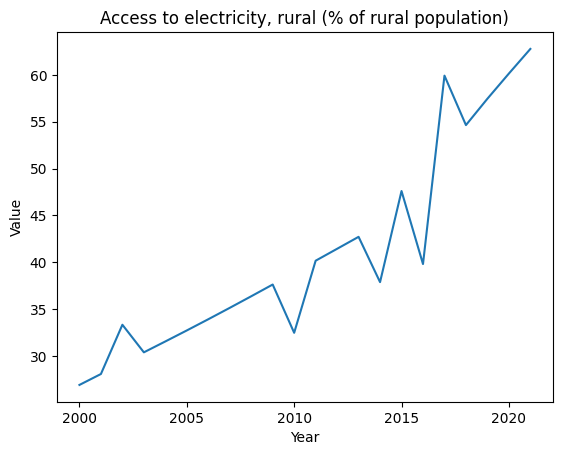

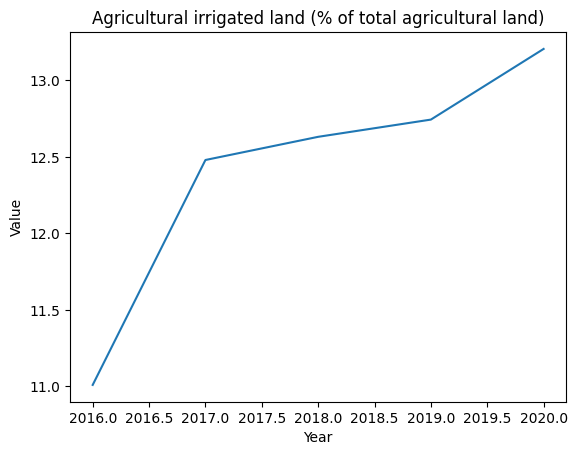

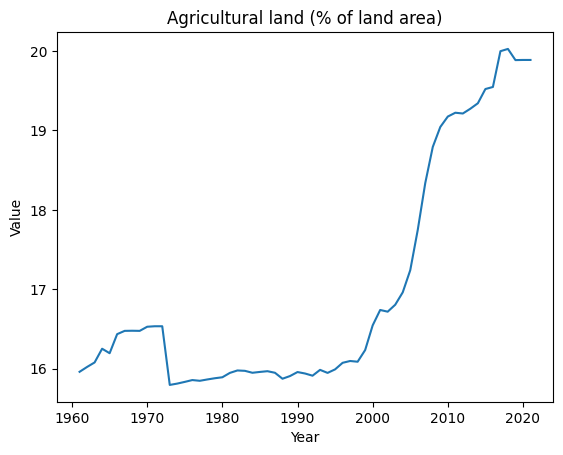

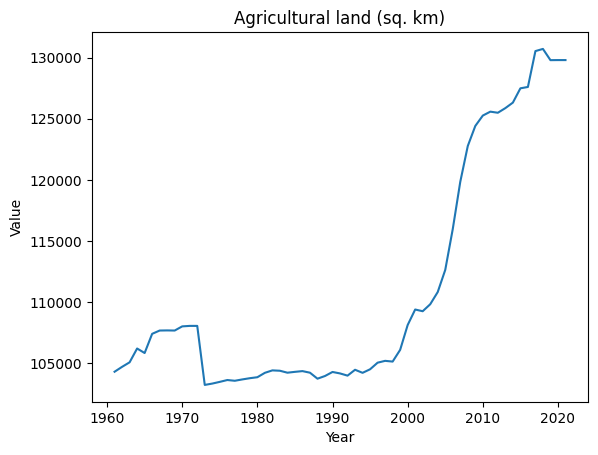

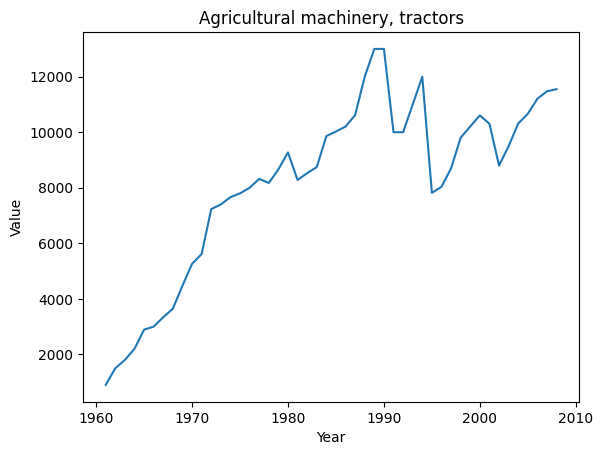

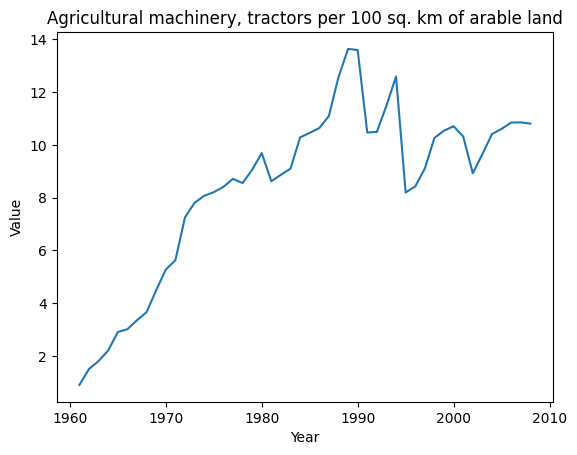

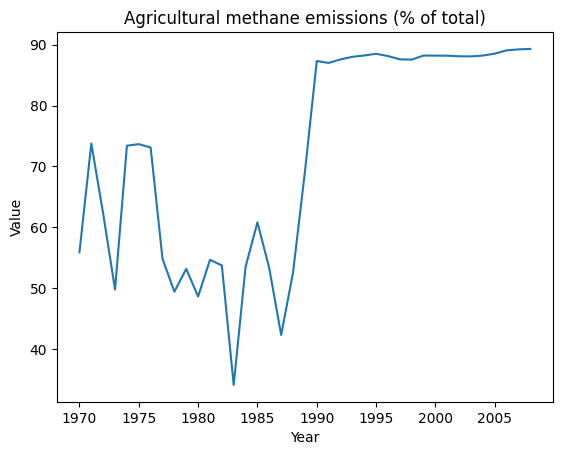

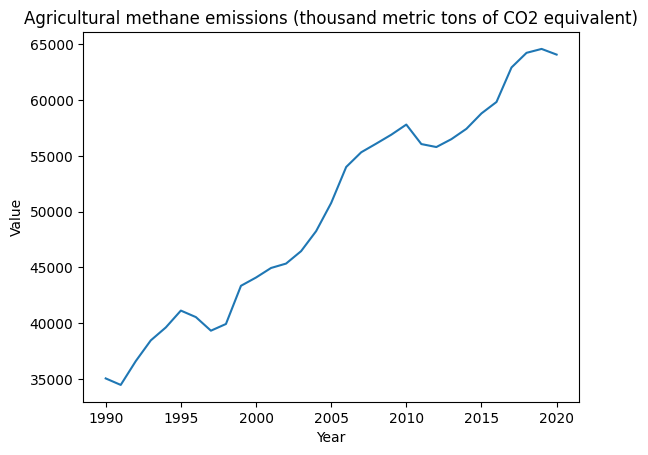

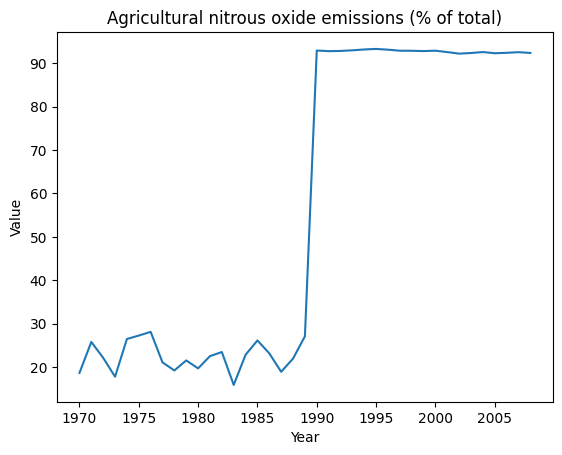

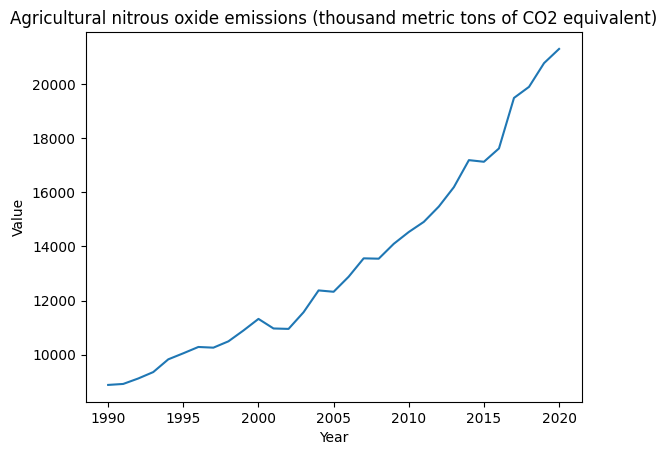

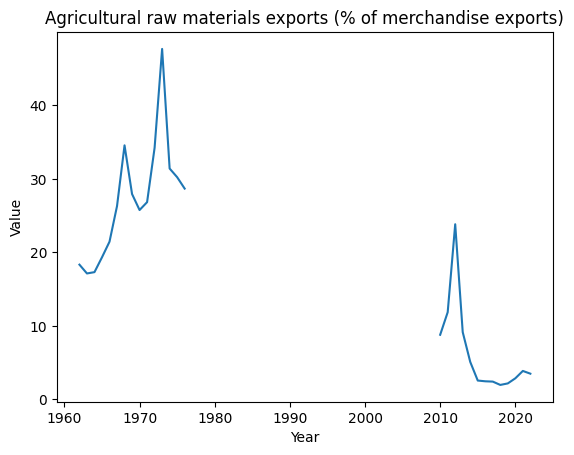

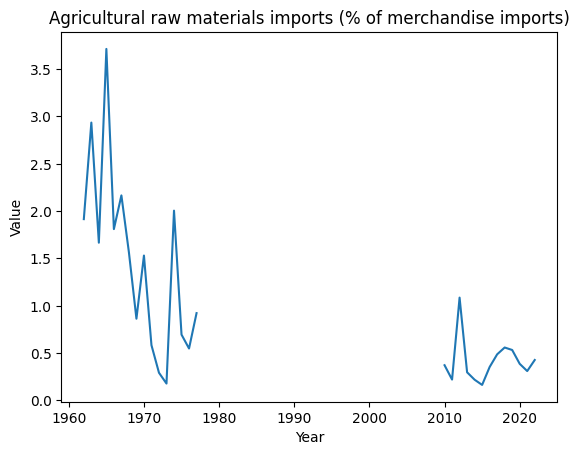

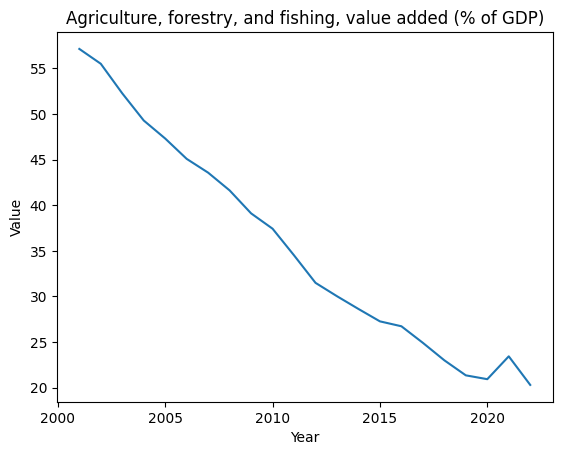

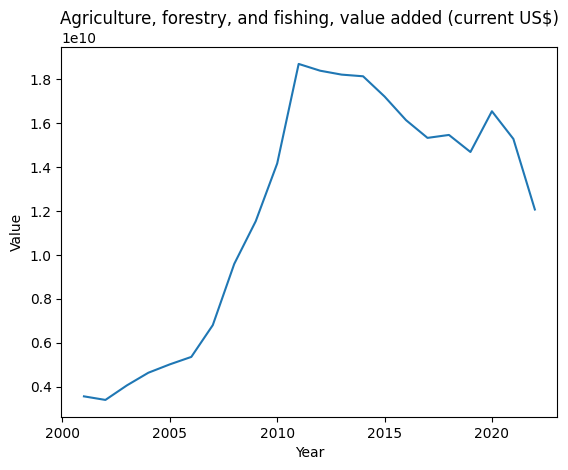

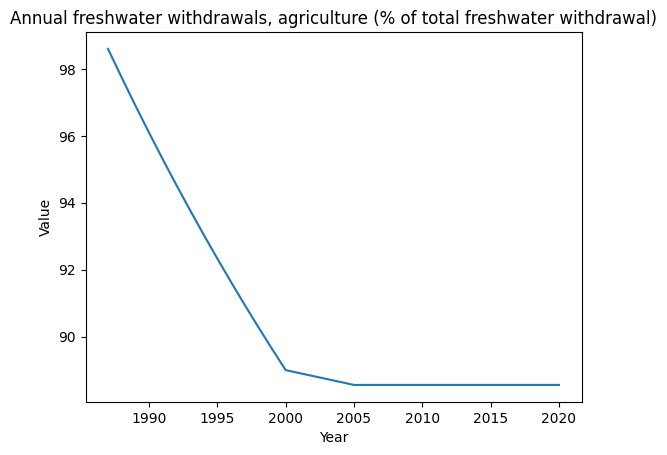

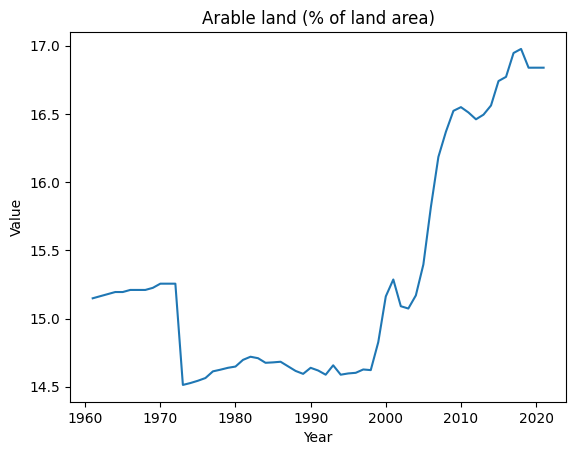

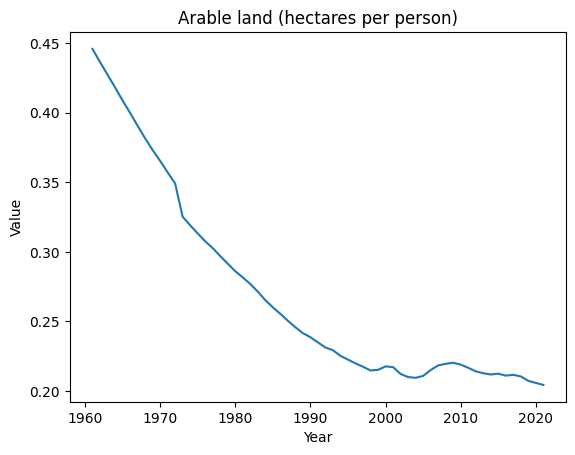

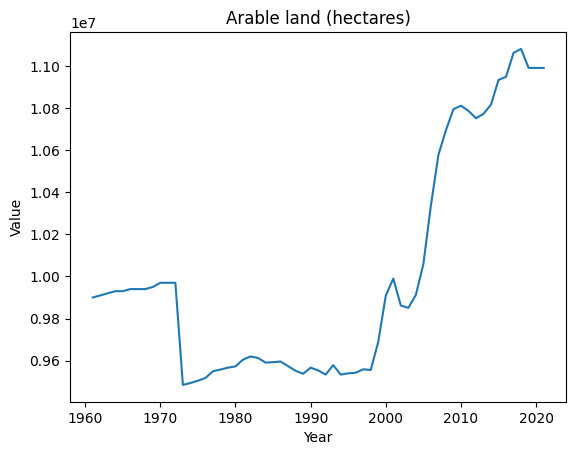

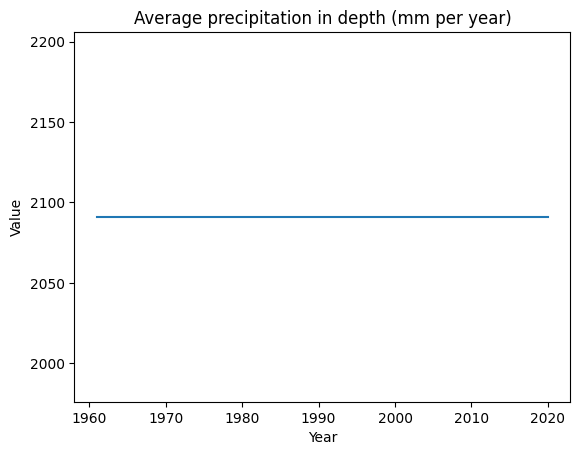

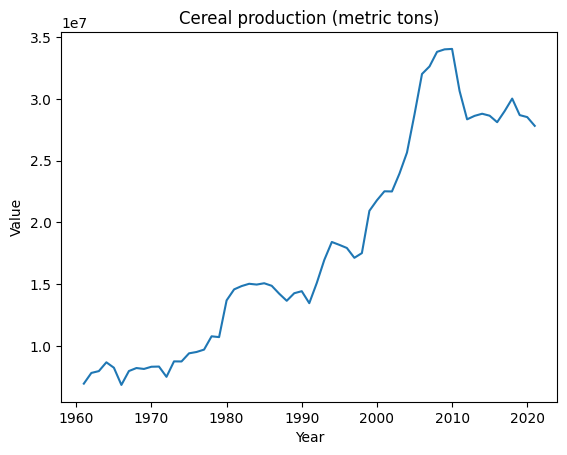

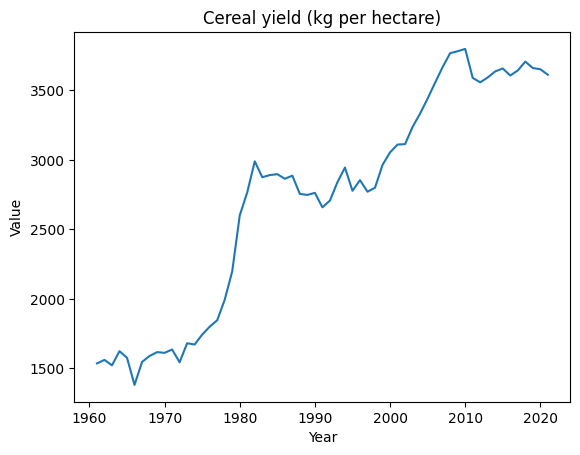

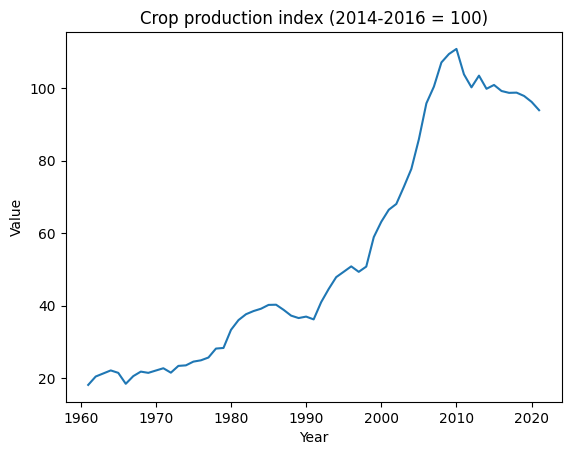

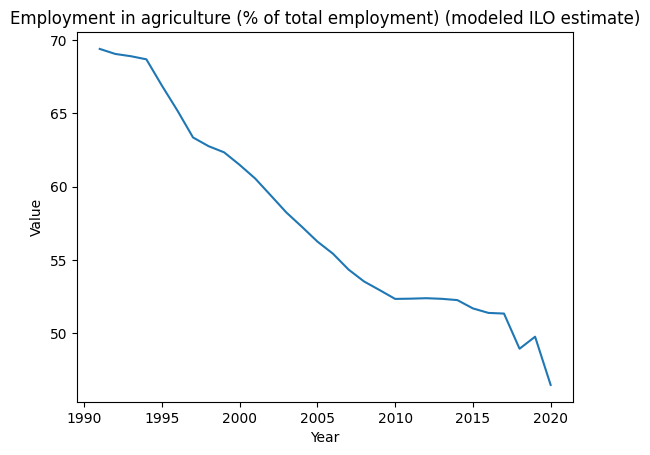

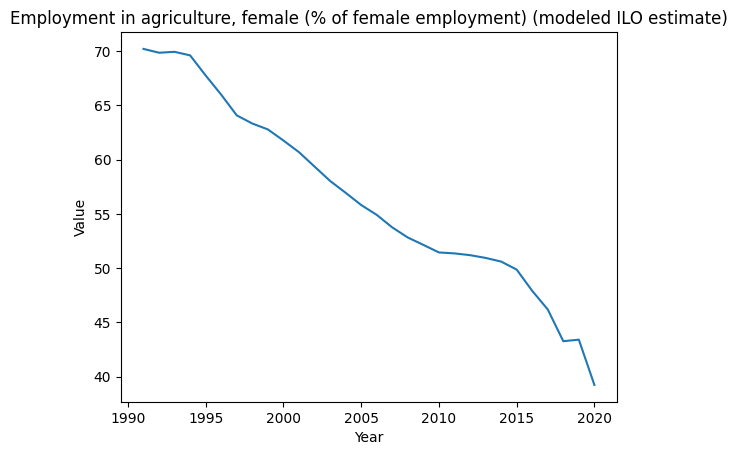

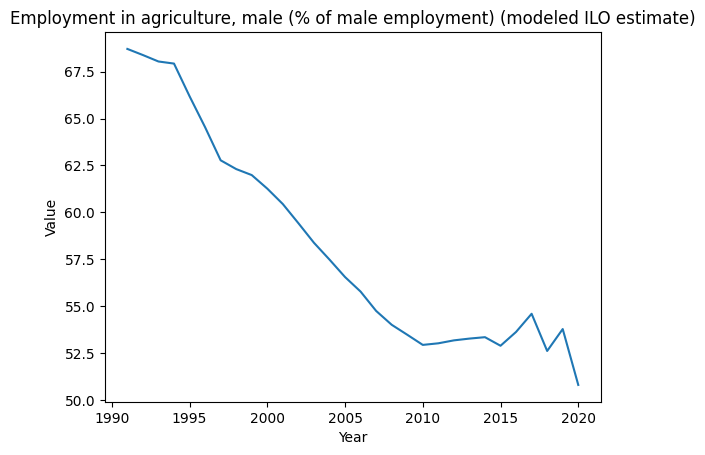

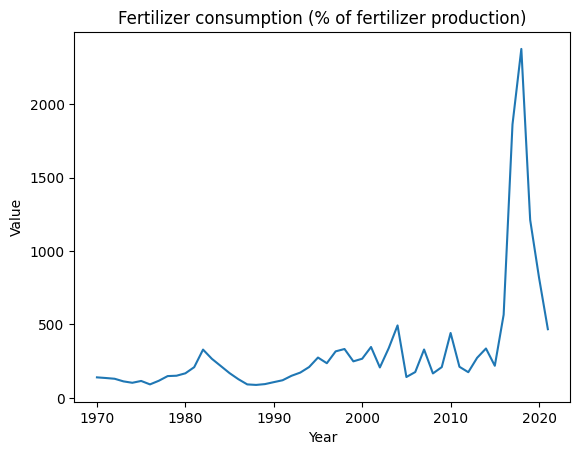

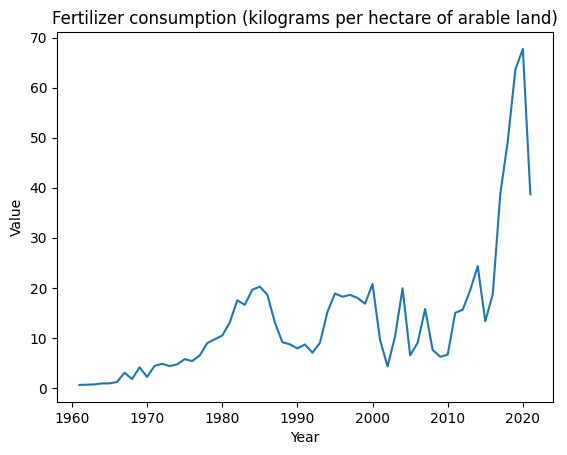

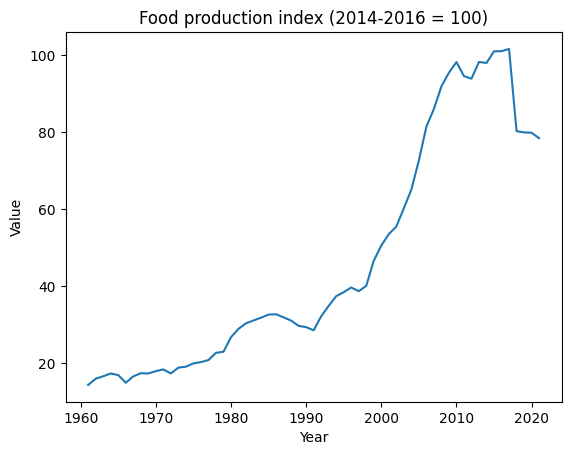

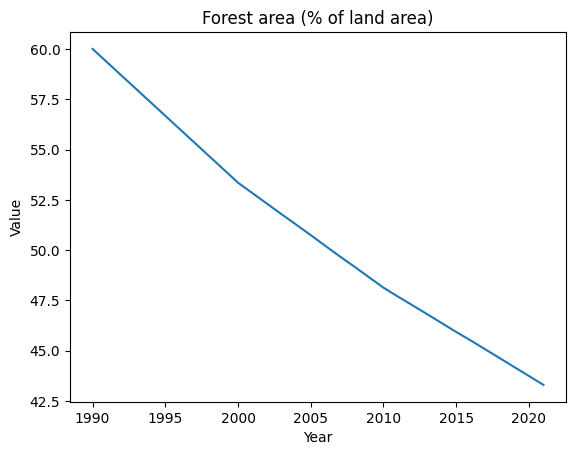

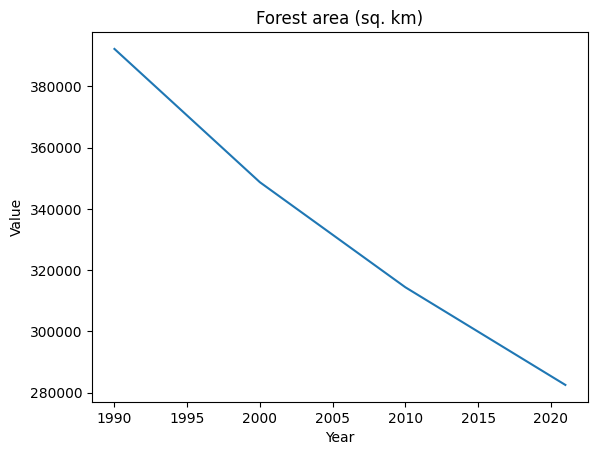

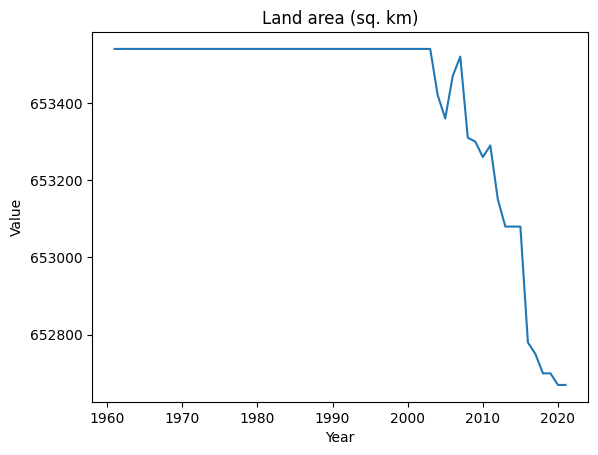

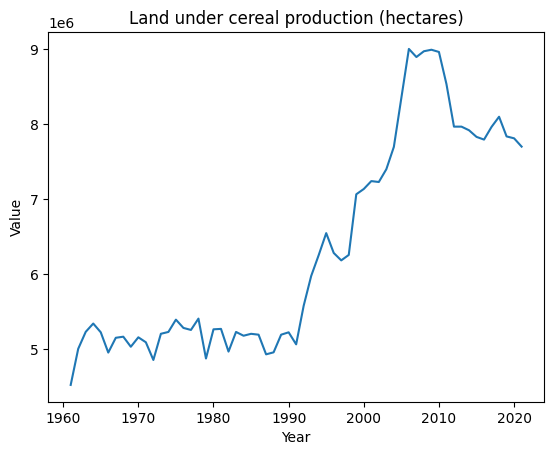

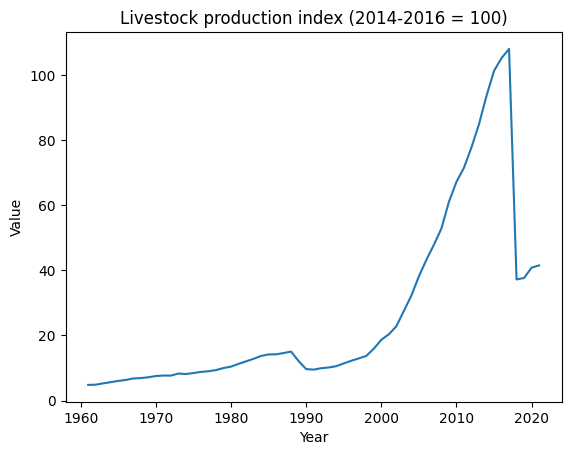

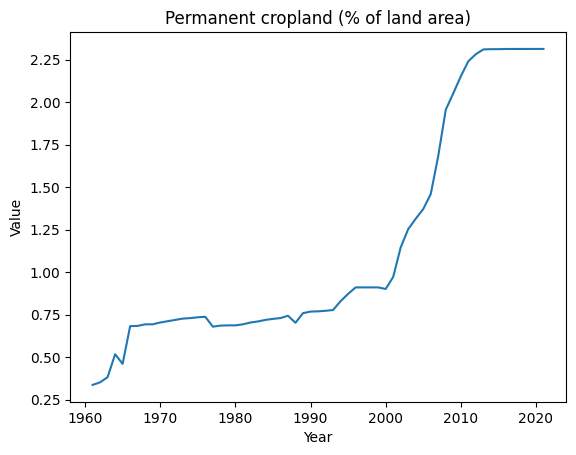

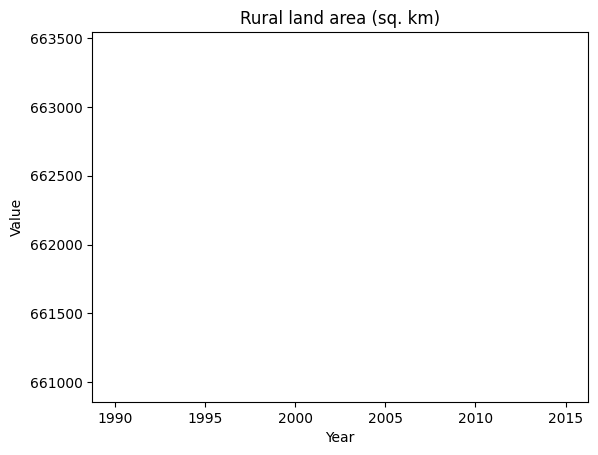

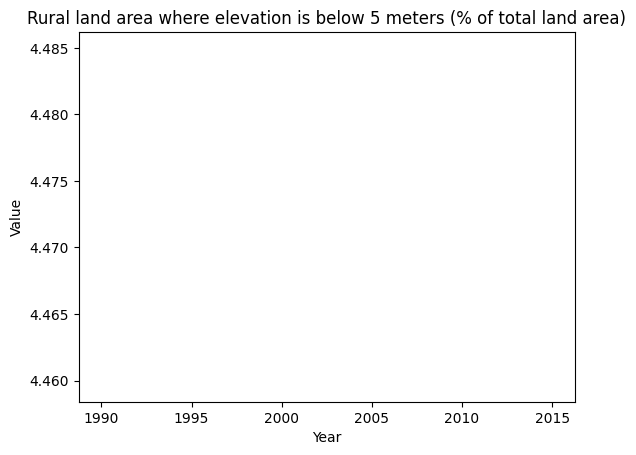

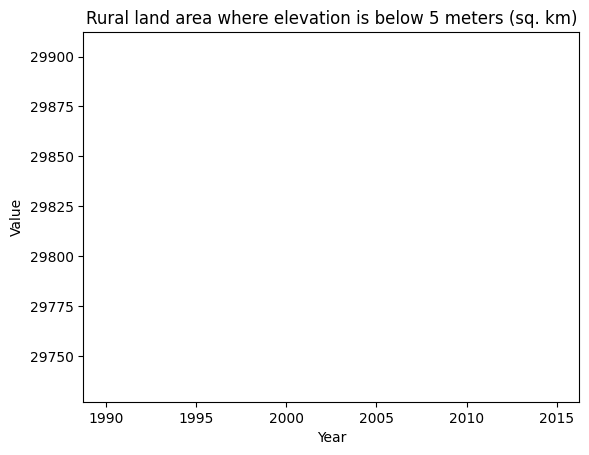

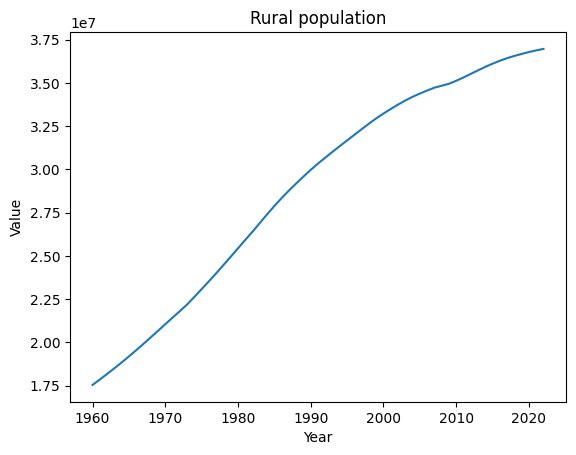

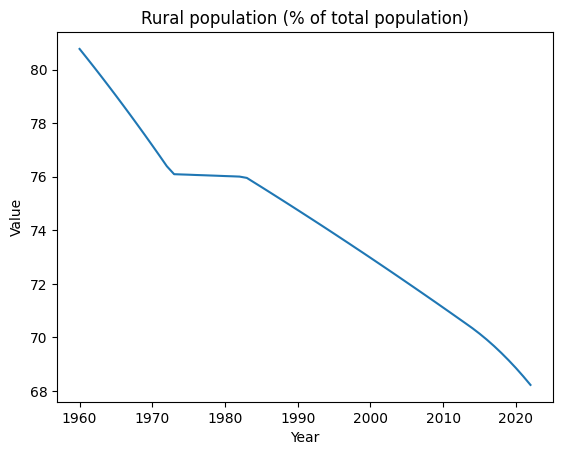

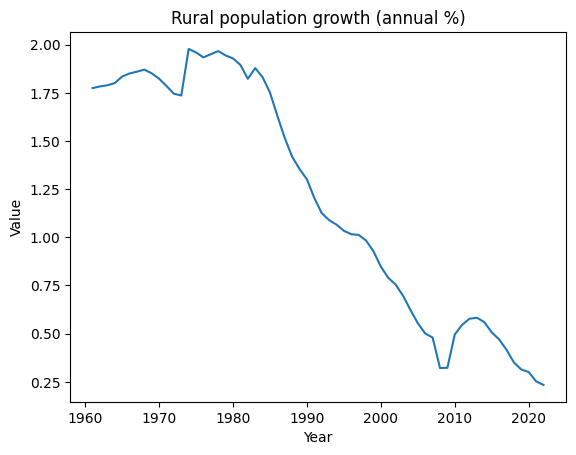

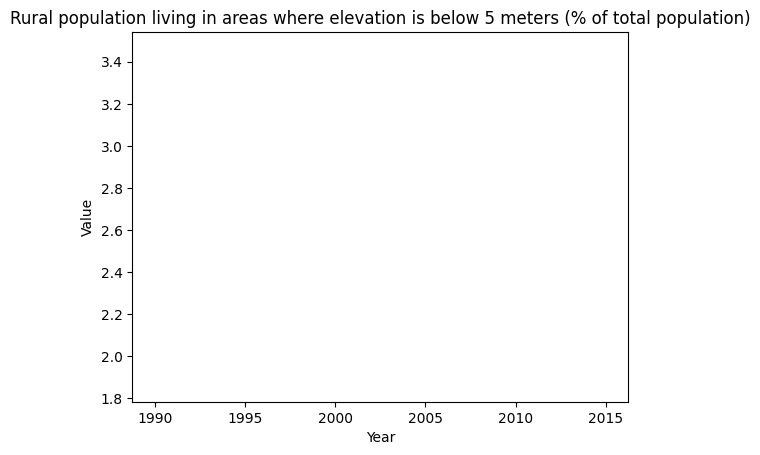

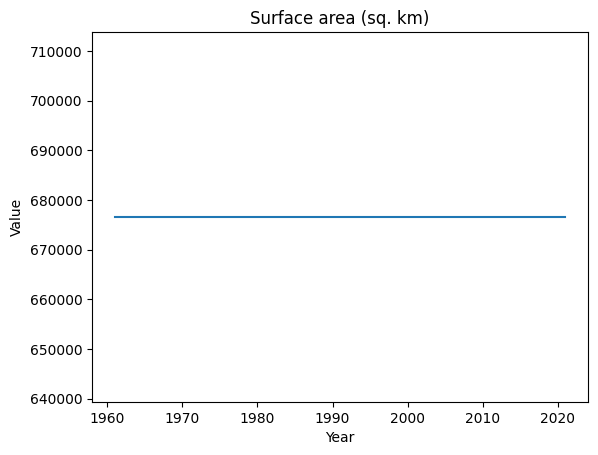

In [ ]:
# plot line chart for all cols wrt yr
for col in df_agri_mmr_pivot.columns[1:]:
  plt.plot(df_agri_mmr_pivot['Year'], df_agri_mmr_pivot[col])
  plt.title(col)
  plt.xlabel('Year')
  plt.ylabel('Value')
  plt.show()

In [ ]:
df_zwe = pd.read_csv('/content/drive/MyDrive/UN Datathon 2023/Zimbabwe/zwe_anon_df.csv')
df_zwe

,objectid,survey_id,operator_id,adm0_name,adm0_iso3,adm1_pcode,adm1_name,adm2_pcode,adm2_name,adm_level,...,need_received_seeds,need_received_extensionservices,need_received_livestockfeed,need_received_other,need_received_noassistreceived,need_received_dk,need_received_ref,callback,language,weight_final
0,376440,U1982542378172075149,ZWE07,Zimbabwe,ZWE,ZW15,Matabeleland North,ZW1521,Hwange Urban,1,...,No,No,No,No,Yes,No,No,Yes,9,0.004353
1,374767,U5390342880303474844,ZWE04,Zimbabwe,ZWE,ZW16,Matabeleland South,ZW1606,Matobo,1,...,No,No,No,No,Yes,No,No,Yes,9,0.359176
2,376070,U-6560739305236880528,ZWE22,Zimbabwe,ZWE,ZW18,Masvingo,ZW1822,Chiredzi Urban,1,...,No,No,No,No,Yes,No,No,Yes,9,1.273214
3,376602,U2756020898481629878,ZWE04,Zimbabwe,ZWE,ZW16,Matabeleland South,ZW1606,Matobo,1,...,No,No,No,No,Yes,No,No,Yes,9,0.912180
4,376468,U3445784572885594777,ZWE02,Zimbabwe,ZWE,ZW14,Mashonaland West,ZW1402,Hurungwe,1,...,No,No,No,No,Yes,No,No,Yes,9,2.743292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1983,374962,U5028499319806263231,ZWE21,Zimbabwe,ZWE,ZW11,Manicaland,ZW1101,Buhera,1,...,No,No,No,No,Yes,No,No,Yes,1,0.782296
1984,375905,U7800016323526335485,ZWE04,Zimbabwe,ZWE,ZW16,Matabeleland South,ZW1601,Beitbridge,1,...,No,No,No,No,Yes,No,No,Yes,9,0.912180
1985,374731,U-3560358499808977905,ZWE14,Zimbabwe,ZWE,ZW16,Matabeleland South,ZW1601,Beitbridge,1,...,No,No,No,No,Yes,No,No,Yes,9,0.912180
1986,375514,U-7701902386384116534,ZWE04,Zimbabwe,ZWE,ZW13,Mashonaland East,ZW1321,Marondera Urban,1,...,No,No,No,No,Yes,No,No,Yes,9,0.157418
